In [116]:
import json

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

from collections import defaultdict, Counter

In [127]:
JSON_DATA_FILE = 'parsed_data.json'
FAULTY_DATA = ["KUKA_ECCFC94D66_20240321_160140-FOLGE21", "KAA3G1224240R04_20240127_061510-FOLGE37", "KUKA_ECCFC94D66_20240322_040640-FOLGE21"]

In [118]:
data = None

with open(JSON_DATA_FILE) as f:
    data = json.load(f)


In [119]:
print(data[0])

{'id': 'KAA3G1224240R04_20240207_150910-FOLGE45', 'robot': 'KAA3G1224240R04', 'type': '10', 'program': 'FOLGE45', 'start_timestamp': '2024-02-07T15:07:45.509Z', 'time': [0.0, 0.0, 0.396, 0.571, 0.571, 0.808, 1.014, 1.03, 1.03, 1.03, 1.442, 1.442, 1.6480000000000001, 1.854, 2.091, 2.281, 2.456, 2.693, 2.899, 2.9779999999999998, 2.9779999999999998, 3.311, 3.501, 3.501, 3.501, 3.723, 3.9290000000000003, 3.976, 3.976, 4.341, 4.499, 4.499, 4.752, 4.958, 5.038, 5.038, 5.038, 5.386, 5.529, 5.529, 5.529, 5.798, 6.004, 6.051, 6.051, 6.051, 6.416, 6.558, 6.827, 7.033, 7.049, 7.049, 7.049, 7.049, 7.445, 7.572, 7.572, 7.857, 8.063, 8.079, 8.079, 8.079, 8.475, 8.602, 8.602, 8.602, 8.887, 9.108, 9.108, 9.108, 9.108, 9.314, 9.52, 9.599, 9.599, 9.964, 10.106, 10.376, 10.581, 10.803, 11.009, 11.152, 11.152, 11.152, 11.421, 11.627, 11.659, 11.659, 12.039, 12.197, 12.451, 12.704, 12.91, 13.116, 13.322, 13.528, 13.734, 13.939, 14.145, 14.350999999999999, 14.557, 14.763, 14.969, 15.175, 15.381, 15.587, 15.

## Group by robot

In [120]:
robot_data = defaultdict(list)

for d in data:
    robot_data[d['robot']].append(d)

In [121]:
def nominal_values_count_plot(data, variables):
    counts = {key: {var_key: Counter(obj[var_key] for obj in objects) for var_key in variables} for key, objects in data.items()}
    for c_key, c_val in counts.items():
        for var_key, var_val in c_val.items():
            plt.figure()
            plt.title(f'{c_key} {var_key}')
            plt.bar(var_val.keys(), var_val.values())
            plt.show()

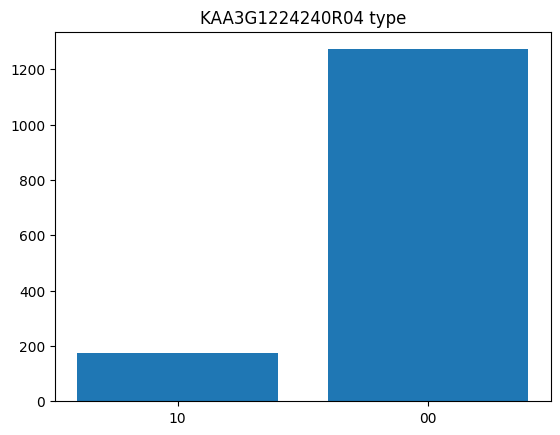

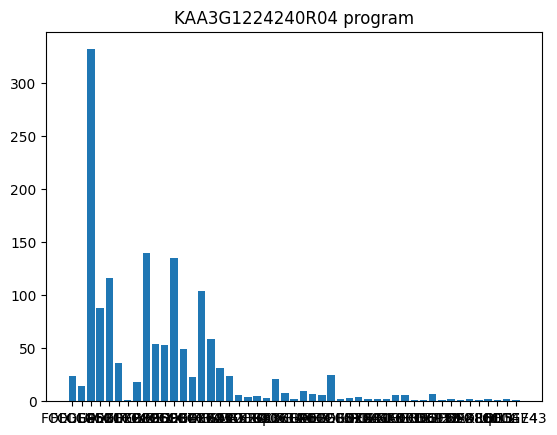

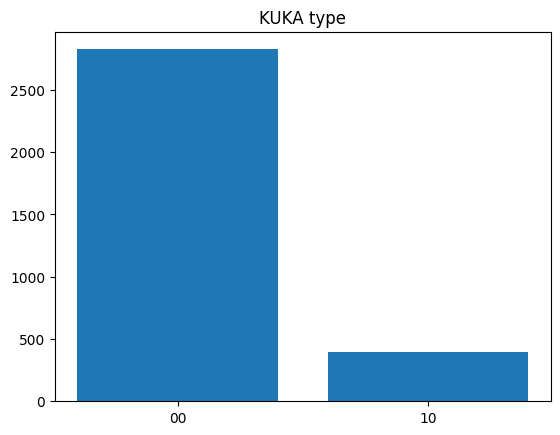

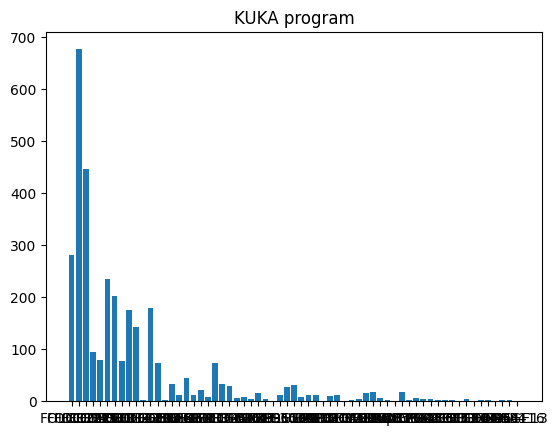

In [122]:
nominal_values_count_plot(robot_data, ['type', 'program'])

In [123]:
import seaborn as sns

def plot_duration(data):
    durations = []
    for objects in data.values():
        durations.append([obj['time'][-1] for obj in objects])
    plt.figure()
    plt.title(f'{" & ".join(data.keys())} duration')

    plt.boxplot(durations)
    plt.xticks(ticks=np.arange(1, len(data.keys()) + 1), labels=data.keys())
    plt.show()

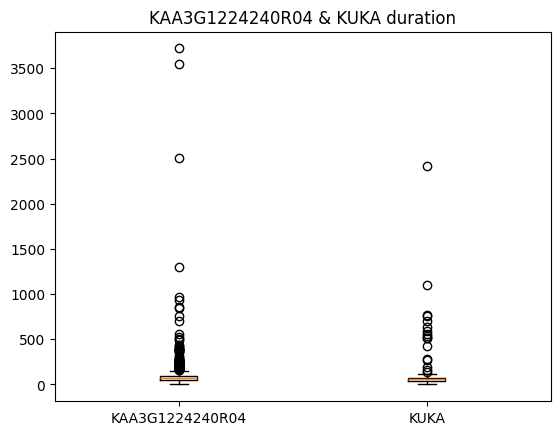

In [124]:
plot_duration(robot_data)

## Group by type

In [125]:
type_data = defaultdict(list)

for d in data:
    type_data[d['type']].append(d)

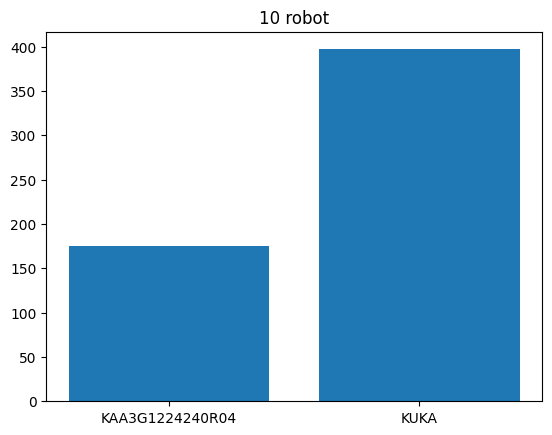

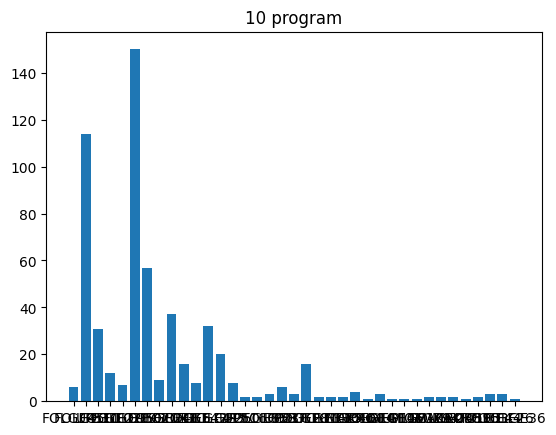

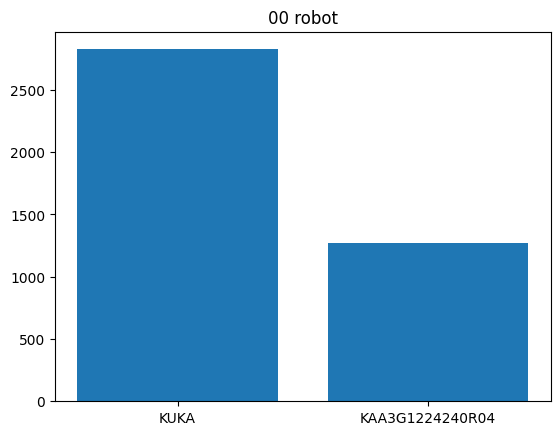

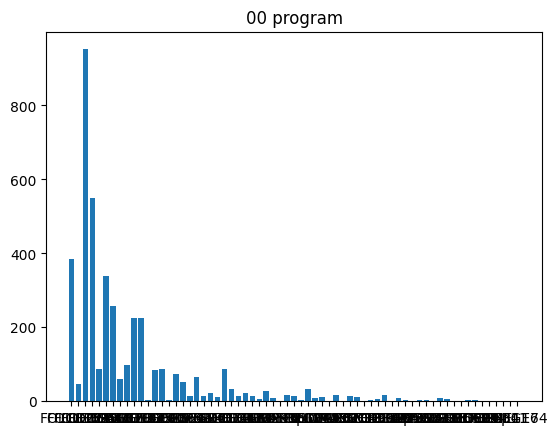

In [126]:
nominal_values_count_plot(type_data, ['robot', 'program'])

In [85]:
def get_stats_of_nominal_values(data, variables):
    counts = {key: {var_key: Counter(obj[var_key] for obj in objects) for var_key in variables} for key, objects in data.items()}
    for c_key, c_val in counts.items():
        for var_key, var_val in c_val.items():
            print(f'{c_key} {var_key}')
            df = pd.DataFrame(var_val.items(), columns=['value', 'count']).sort_values(by='count', ascending=False)
            print(df)
            print()
            print()

In [86]:
get_stats_of_nominal_values(type_data, ['robot', 'program'])

00 robot
             value  count
1             KUKA   3153
0  KAA3G1224240R04   1430


00 program
      value  count
3   FOLGE21   1001
4   FOLGE41    579
1   FOLGE22    396
7    FOLGE1    375
8     UP511    287
..      ...    ...
65     UP22      1
66  FOLGE34      1
40     UP32      1
69     Up11      1
52     Up12      1

[71 rows x 2 columns]


10 robot
             value  count
0             KUKA     58
1  KAA3G1224240R04     16


10 program
     value  count
0  FOLGE93     56
2  FOLGE21      4
6    UP511      3
1  FOLGE95      2
4  FOLGE25      2
5     UP23      2
8  FOLGE42      2
3  FOLGE41      1
7  FOLGE22      1
9   FOLGE1      1




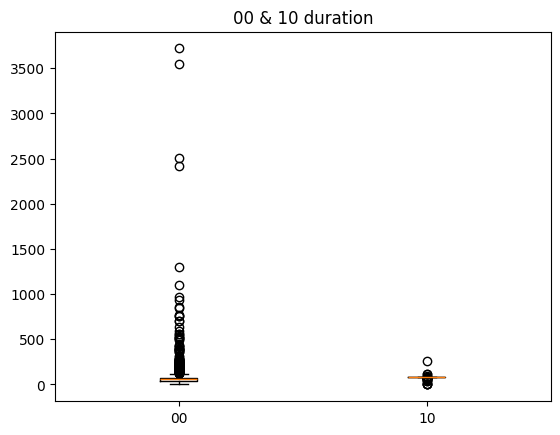

In [87]:
plot_duration(type_data)

## Plot mielages in time

In [100]:
# robot_data["KUKA"]

dt_ordered = sorted(robot_data["KUKA"], key=lambda x: pd.Timestamp(x['start_timestamp']))

In [114]:
def plot_mielages_during_time(data, variables, type):
    where_data = [x for x in dt_ordered if x['type'] == type]
    n_entries = len(data)
    prev_timestamp = get_stats_of_nominal_values
    for var in variables:
        plt.figure()
        plt.title(f'{var} mileage')
        lin = np.linspace(0.1, 1, n_entries)
        for idx, v_timestamp in enumerate(data):
            print(v_timestamp['start_timestamp'])
            n_data = len(v_timestamp[var])
            if n_data > 1300:
                continue
            plt.plot(v_timestamp[var], color='blue', alpha=lin[idx])
        plt.show()


2024-02-05T11:36:52.682Z
2024-02-05T11:36:52.682Z
2024-02-05T11:36:52.682Z
2024-02-05T11:36:52.682Z
2024-02-05T11:36:52.682Z
2024-02-05T11:36:52.682Z
2024-02-05T11:36:52.682Z
2024-02-05T11:36:52.682Z
2024-02-05T11:36:52.682Z
2024-02-05T11:36:52.682Z
2024-02-05T11:36:52.682Z
2024-02-05T11:36:52.682Z
2024-03-21T8:25:31.088Z
2024-03-21T8:36:54.430Z
2024-03-21T8:39:21.988Z
2024-03-21T8:42:01.084Z
2024-03-21T8:50:40.704Z
2024-03-21T8:53:23.420Z
2024-03-21T9:01:26.531Z
2024-03-21T9:10:39.417Z
2024-03-21T9:13:22.148Z
2024-03-21T9:15:52.154Z
2024-03-21T9:18:47.012Z
2024-03-21T9:19:55.516Z
2024-03-21T9:22:00.620Z
2024-03-21T9:33:32.963Z
2024-03-21T9:35:59.948Z
2024-03-21T9:38:42.151Z
2024-03-21T9:41:18.750Z
2024-03-21T9:44:52.180Z
2024-03-21T9:47:23.124Z
2024-03-21T9:50:33.703Z
2024-03-21T9:52:55.650Z
2024-03-21T9:56:14.801Z
2024-03-21T9:58:45.925Z
2024-03-21T10:01:09.810Z
2024-03-21T10:03:31.859Z
2024-03-21T10:07:13.812Z
2024-03-21T10:09:38.753Z
2024-03-21T10:12:15.878Z
2024-03-21T10:14:40.269

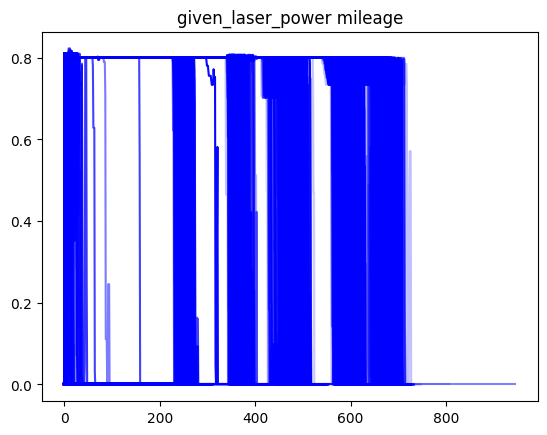

In [115]:
plot_mielages_during_time(dt_ordered, ['given_laser_power'], type="10")

## Plot faulty mileage

In [130]:
def find_item_by_key_value(data, key, value):
    for item in data:
        if item.get(key) == value:
            return item
    return None

def plot_data(x, y, title):
    plt.figure()
    plt.title(title)
    plt.plot(x, y)
    plt.show()

In [129]:
first_faulty = find_item_by_key_value(data, "id", FAULTY_DATA[0])

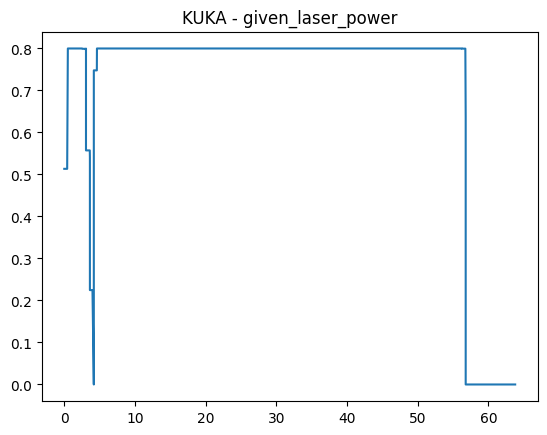

In [135]:
plot_data(first_faulty['time'], first_faulty['given_laser_power'], f"{first_faulty['robot']} - given_laser_power")

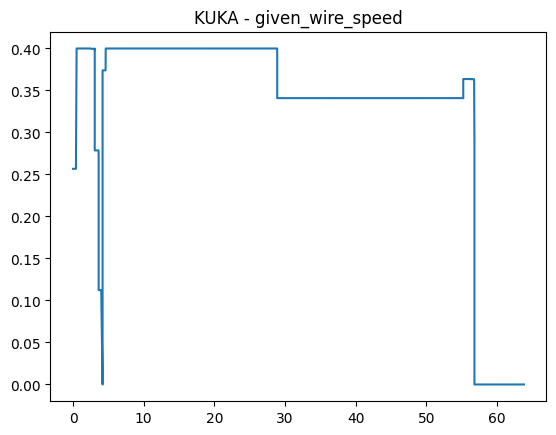

In [136]:
plot_data(first_faulty['time'], first_faulty['given_wire_speed'], f"{first_faulty['robot']} - given_wire_speed")

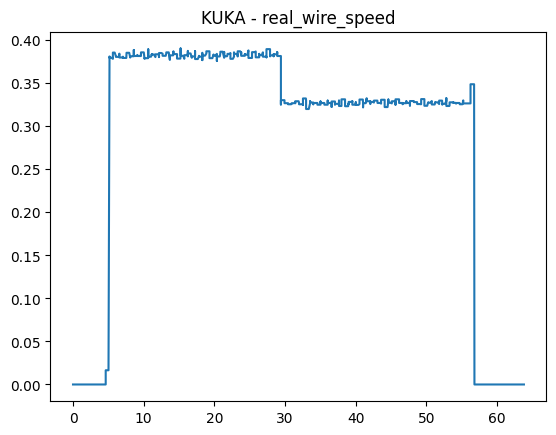

In [137]:
plot_data(first_faulty['time'], first_faulty['real_wire_speed'], f"{first_faulty['robot']} - real_wire_speed")

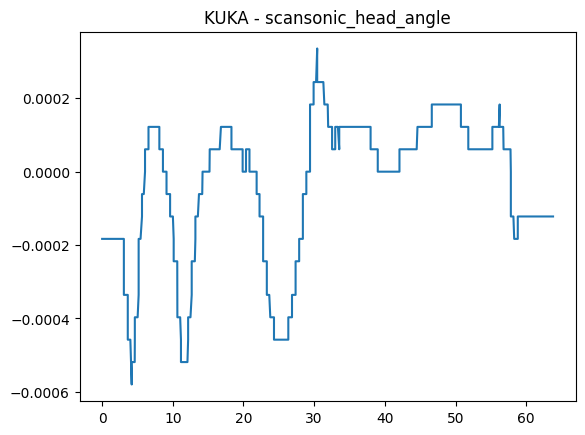

In [142]:
plot_data(first_faulty['time'], first_faulty['scansonic_head_angle'], f"{first_faulty['robot']} - scansonic_head_angle")

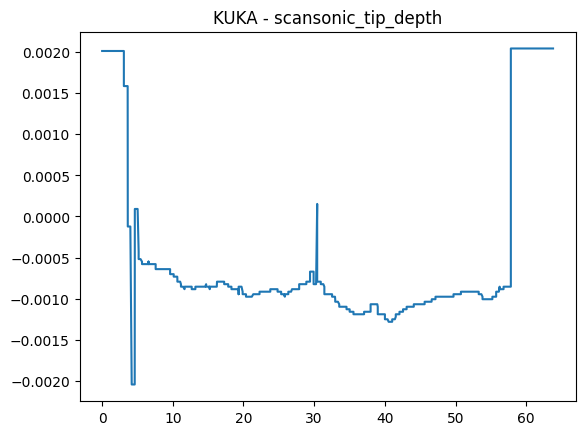

In [143]:
plot_data(first_faulty['time'], first_faulty['scansonic_tip_depth'], f"{first_faulty['robot']} - scansonic_tip_depth")

## Group data

In [191]:
grouped_data = defaultdict(list)

for d in data:
    d['time_to_failure'] =  pd.Timedelta(pd.Timestamp(first_faulty['start_timestamp']) - pd.Timestamp(d['start_timestamp']))
    grouped_data[(d['robot'], d['type'], d['program'])].append(d)

In [182]:
test = grouped_data[(first_faulty['robot'], first_faulty['type'], first_faulty['program'])]

print(len(grouped_data.keys()))

158


In [193]:
def plot_mielages(data, variables):
    for var in variables:
        plt.figure()
        plt.title(f'{var} mileage')
        for d in data:
            if d['id'] in FAULTY_DATA:
                plt.plot(d[var], color='red')
                print(d['id'])
            else:
                plt.plot(d[var], color='blue', alpha=0.1)
        plt.show()

KUKA_ECCFC94D66_20240322_040640-FOLGE21
KUKA_ECCFC94D66_20240321_160140-FOLGE21


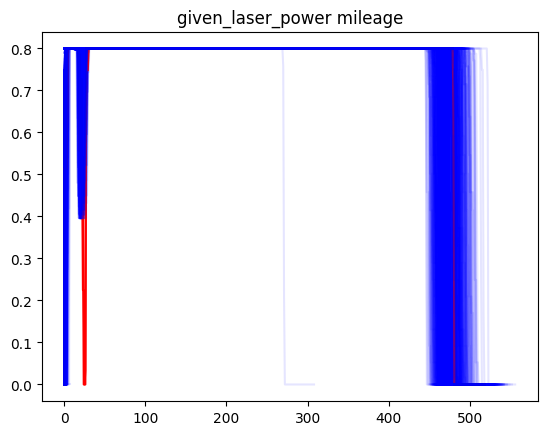

In [155]:
plot_mielages(test, ['given_laser_power'])

KUKA_ECCFC94D66_20240322_040640-FOLGE21
KUKA_ECCFC94D66_20240321_160140-FOLGE21


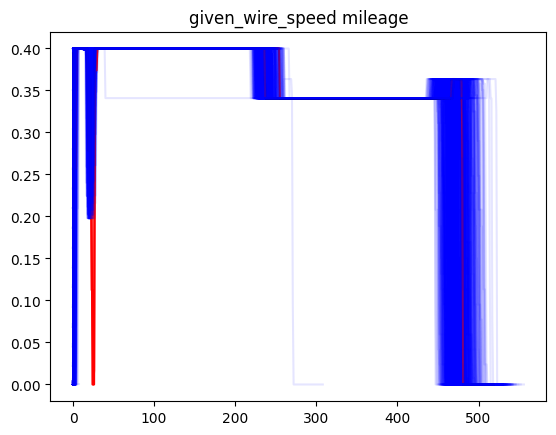

In [157]:
plot_mielages(test, ['given_wire_speed'])

KUKA_ECCFC94D66_20240322_040640-FOLGE21
KUKA_ECCFC94D66_20240321_160140-FOLGE21


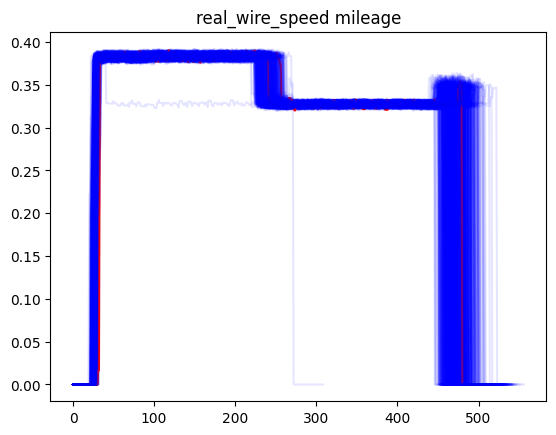

In [158]:
plot_mielages(test, ['real_wire_speed'])

KUKA_ECCFC94D66_20240322_040640-FOLGE21
KUKA_ECCFC94D66_20240321_160140-FOLGE21


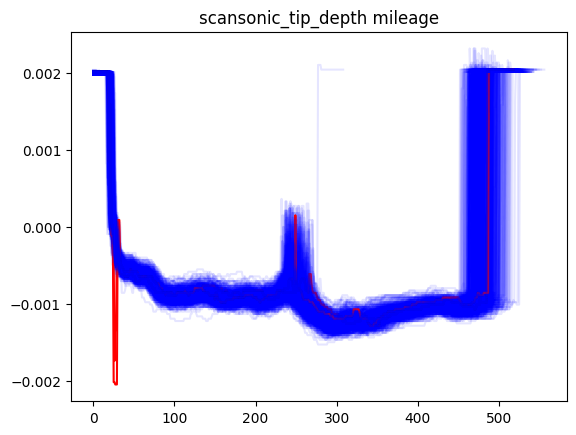

In [162]:
plot_mielages(test, ['scansonic_tip_depth'])

/var/folders/r4/jx9mrl69663d5mws4ghflznm0000gn/T/ipykernel_38392/1309459675.py:4: RuntimeWarning: divide by zero encountered in divide
  percentage = np.array(d['given_wire_speed']) / np.array(d['real_wire_speed'])
/var/folders/r4/jx9mrl69663d5mws4ghflznm0000gn/T/ipykernel_38392/1309459675.py:4: RuntimeWarning: invalid value encountered in divide
  percentage = np.array(d['given_wire_speed']) / np.array(d['real_wire_speed'])


KUKA_ECCFC94D66_20240322_040640-FOLGE21
KUKA_ECCFC94D66_20240321_160140-FOLGE21


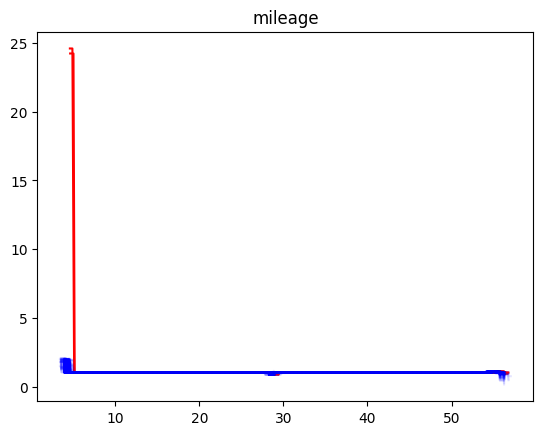

In [166]:

plt.figure()
plt.title(f'mileage')
for d in test:
    percentage = np.array(d['given_wire_speed']) / np.array(d['real_wire_speed'])
    if d['id'] in FAULTY_DATA:
        plt.plot(d['time'], percentage, color='red')
        print(d['id'])
    else:
        plt.plot(d['time'], percentage, color='blue', alpha=0.1)
plt.show()

/var/folders/r4/jx9mrl69663d5mws4ghflznm0000gn/T/ipykernel_38392/3582687413.py:15: RuntimeWarning: divide by zero encountered in divide
  percentage = np.array(d['given_wire_speed']) / np.array(d['real_wire_speed'])
/var/folders/r4/jx9mrl69663d5mws4ghflznm0000gn/T/ipykernel_38392/3582687413.py:15: RuntimeWarning: invalid value encountered in divide
  percentage = np.array(d['given_wire_speed']) / np.array(d['real_wire_speed'])


KUKA_ECCFC94D66_20240322_040640-FOLGE21
KUKA_ECCFC94D66_20240321_160140-FOLGE21


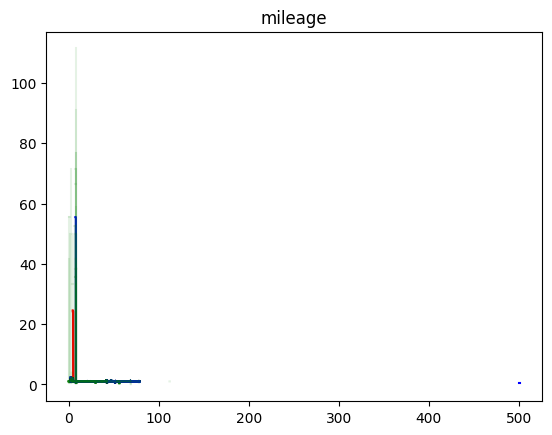

120


In [195]:

# temp_all_data = defaultdict(list)

# for d in data:
#     d['time_to_failure'] =  pd.Timedelta(pd.Timestamp(first_faulty['start_timestamp']) - pd.Timestamp(d['start_timestamp'])).days
#     grouped_data[(d['robot'], d['type'], d['program'])].append(d)

plt.figure()
plt.title(f'mileage')
temp_before_failure = []
i = 0
for key in grouped_data:
    for d in grouped_data[key]:
        if d['robot'] != 'KUKA':
            continue
        percentage = np.array(d['given_wire_speed']) / np.array(d['real_wire_speed'])
        if d['id'] in FAULTY_DATA:
            temp_before_failure.append(d)
            plt.plot(d['time'], percentage, color='red')
            print(d['id'])
        else:
            if d['time_to_failure'].total_seconds() >= 0:
                i+=1
                temp_before_failure.append(d)
                plt.plot(d['time'], percentage, color='blue', alpha=1 - d['time_to_failure'].days / 100)
            else:
                plt.plot(d['time'], percentage, color='green', alpha=0.1)
plt.show()
print(i)

KUKA_ECCFC94D66_20240322_040640-FOLGE21
KUKA_ECCFC94D66_20240321_160140-FOLGE21


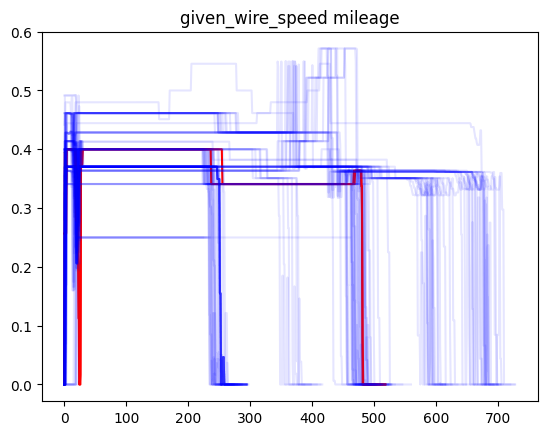

KUKA_ECCFC94D66_20240322_040640-FOLGE21
KUKA_ECCFC94D66_20240321_160140-FOLGE21


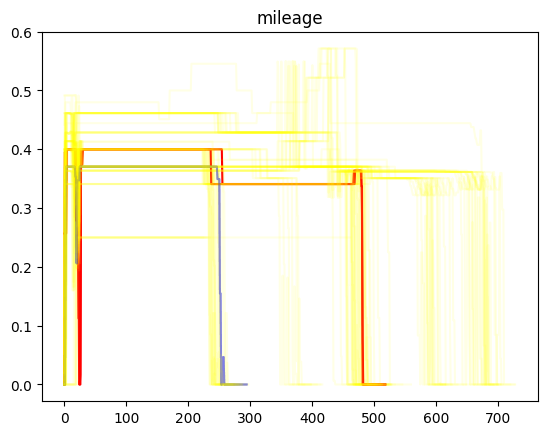

In [199]:
plot_mielages(temp_before_failure, ['given_wire_speed'])

temp_var = 'given_wire_speed'
plt.figure()
plt.title(f'mileage')
for d in temp_before_failure:
    if d['id'] in FAULTY_DATA:
        plt.plot(d[temp_var], color='red')
        print(d['id'])
    else:
        if d['time_to_failure'].days == 0:
            plt.plot(d[temp_var], color='yellow', alpha=0.1)
        else:
            plt.plot(d[temp_var], color='blue', alpha=0.05)
plt.show()

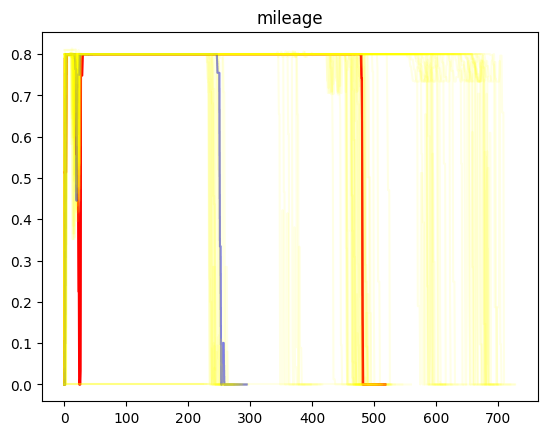

In [200]:
temp_var = 'given_laser_power'
plt.figure()
plt.title(f'mileage')
for d in temp_before_failure:
    if d['id'] in FAULTY_DATA:
        plt.plot(d[temp_var], color='red')
    else:
        if d['time_to_failure'].days == 0:
            plt.plot(d[temp_var], color='yellow', alpha=0.1)
        else:
            plt.plot(d[temp_var], color='blue', alpha=0.05)
plt.show()

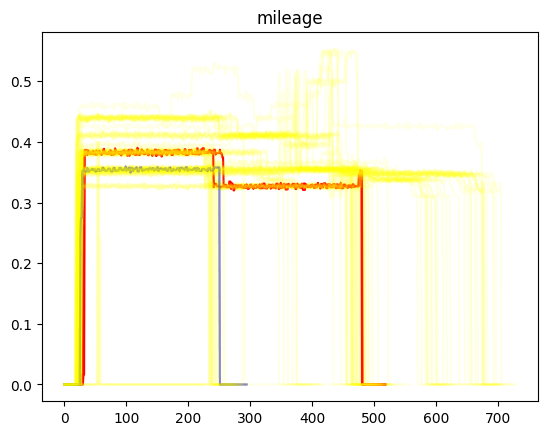

In [201]:
temp_var = 'real_wire_speed'
plt.figure()
plt.title(f'mileage')
for d in temp_before_failure:
    if d['id'] in FAULTY_DATA:
        plt.plot(d[temp_var], color='red')
    else:
        if d['time_to_failure'].days == 0:
            plt.plot(d[temp_var], color='yellow', alpha=0.1)
        else:
            plt.plot(d[temp_var], color='blue', alpha=0.05)
plt.show()

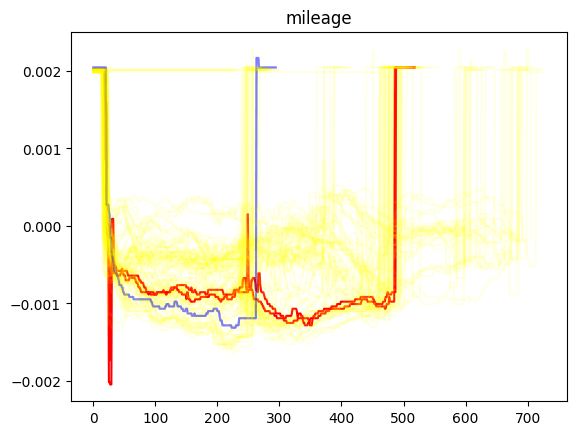

In [205]:
temp_var = 'scansonic_tip_depth'
plt.figure()
plt.title(f'mileage')
for d in temp_before_failure:
    if d['id'] in FAULTY_DATA:
        plt.plot(d[temp_var], color='red')
    else:
        if d['time_to_failure'].days == 0:
            plt.plot(d[temp_var], color='yellow', alpha=0.1)
        else:
            plt.plot(d[temp_var], color='blue', alpha=0.05)
plt.show()

/var/folders/r4/jx9mrl69663d5mws4ghflznm0000gn/T/ipykernel_38392/4214419843.py:9: RuntimeWarning: divide by zero encountered in divide
  percentage = np.array(d['given_wire_speed']) / np.array(d['real_wire_speed'])
/var/folders/r4/jx9mrl69663d5mws4ghflznm0000gn/T/ipykernel_38392/4214419843.py:9: RuntimeWarning: invalid value encountered in divide
  percentage = np.array(d['given_wire_speed']) / np.array(d['real_wire_speed'])


KUKA_ECCFC94D66_20240322_040640-FOLGE21
KUKA_ECCFC94D66_20240321_160140-FOLGE21


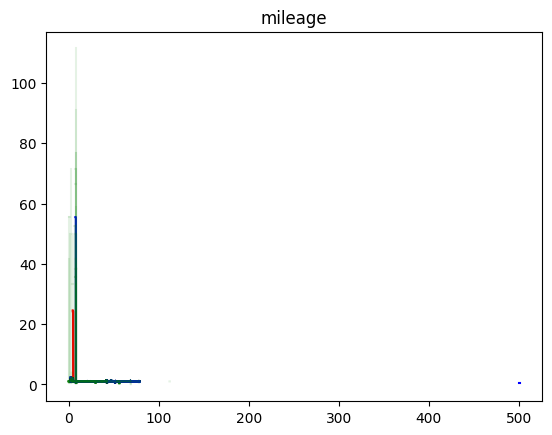

3220


In [207]:
plt.figure()
plt.title(f'mileage')
temp_before_after_failure = []
i = 0
for key in grouped_data:
    for d in grouped_data[key]:
        if d['robot'] != 'KUKA':
            continue
        percentage = np.array(d['given_wire_speed']) / np.array(d['real_wire_speed'])
        if d['id'] in FAULTY_DATA:
            temp_before_after_failure.append(d)
            plt.plot(d['time'], percentage, color='red')
            print(d['id'])
        else:
            if d['time_to_failure'].total_seconds() >= 0:
                i+=1
                temp_before_after_failure.append(d)
                plt.plot(d['time'], percentage, color='blue', alpha=1 - d['time_to_failure'].days / 100)
            elif d['time_to_failure'].days < 2:
                i+=1
                temp_before_after_failure.append(d)
                plt.plot(d['time'], percentage, color='green', alpha=0.1)
plt.show()
print(i)

In [208]:
grouped_test_data = defaultdict(list)

for d in temp_before_after_failure:
    d['time_to_failure'] =  pd.Timedelta(pd.Timestamp(first_faulty['start_timestamp']) - pd.Timestamp(d['start_timestamp']))
    grouped_test_data[(d['robot'], d['type'], d['program'])].append(d)

In [209]:
test_before_after = grouped_test_data[(first_faulty['robot'], first_faulty['type'], first_faulty['program'])]


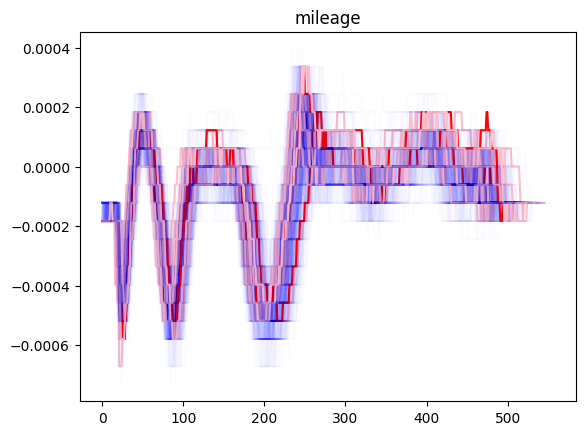

0


In [220]:
temp_var = 'scansonic_head_angle'
plt.figure()
plt.title(f'mileage')
i = 0
for d in test_before_after:
    if d['id'] in FAULTY_DATA:
        plt.plot(d[temp_var], color='red')
    else:
        if d['time_to_failure'].total_seconds() >= 0:
            if d['time_to_failure'].total_seconds() > 360000:
                plt.plot(d[temp_var], color='yellow', alpha=1)
                i+=1
            else:
                plt.plot(d[temp_var], color='pink', alpha=1)
        else:
            plt.plot(d[temp_var], color='blue', alpha=0.01)
plt.show()
print(i)

In [221]:
second_faulty = find_item_by_key_value(data, "id", FAULTY_DATA[2])

In [223]:
test_before_after_2 = grouped_test_data[(second_faulty['robot'], second_faulty['type'], second_faulty['program'])]


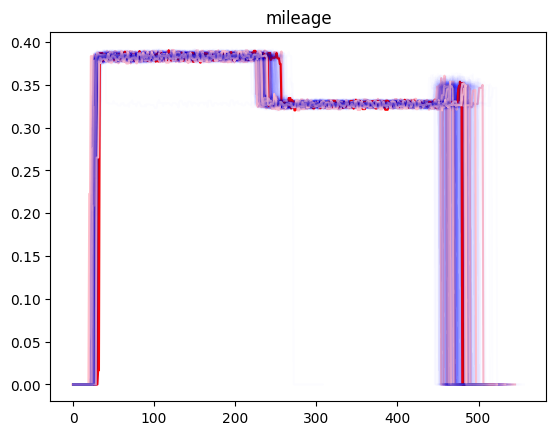

0


In [228]:
temp_var = 'real_wire_speed'
plt.figure()
plt.title(f'mileage')
i = 0
for d in test_before_after_2:
    if d['id'] in FAULTY_DATA:
        plt.plot(d[temp_var], color='red')
    else:
        if d['time_to_failure'].total_seconds() >= 0:
            if d['time_to_failure'].total_seconds() > 360000:
                plt.plot(d[temp_var], color='yellow', alpha=1)
                i+=1
            else:
                plt.plot(d[temp_var], color='pink', alpha=1)
        else:
            plt.plot(d[temp_var], color='blue', alpha=0.01)
plt.show()
print(i)

## Paluch - jeden przed + błąd + jeden po

In [229]:
before_failure_21 = find_item_by_key_value(data, "id", "KUKA_ECCFC94D66_20240322_035840-FOLGE43")
failure_21 = find_item_by_key_value(data, "id", FAULTY_DATA[2])
after_failure_21 = find_item_by_key_value(data, "id", "KUKA_ECCFC94D66_20240322_040820-FOLGE4")

case_21 = [before_failure_21, failure_21, after_failure_21]

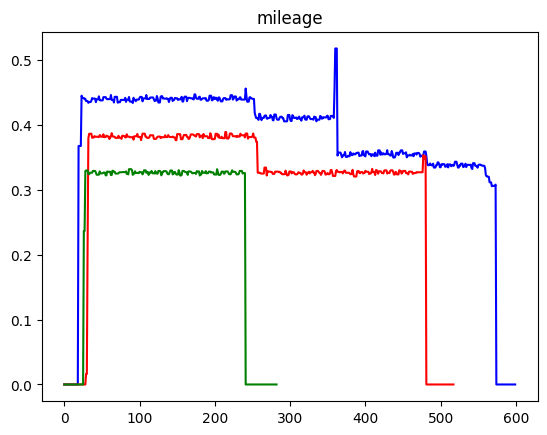

0


In [230]:
temp_var = 'real_wire_speed'
plt.figure()
plt.title(f'mileage')
i = 0
colors = ['blue', 'red', 'green']
for idx, d in enumerate(case_21):
    plt.plot(d[temp_var], color=colors[idx])
plt.show()
print(i)

## The same Folge

In [254]:
additional_before_failure_1 = find_item_by_key_value(data, "id", "KUKA_ECCFC94D66_20240322_033210-FOLGE21")
before_failure_1 = find_item_by_key_value(data, "id", "KUKA_ECCFC94D66_20240322_035230-FOLGE21")
failure_1 = find_item_by_key_value(data, "id", FAULTY_DATA[2])
after_failure_1 = find_item_by_key_value(data, "id", "KUKA_ECCFC94D66_20240322_043530-FOLGE21")
additional_after_failure_1 = find_item_by_key_value(data, "id", "KUKA_ECCFC94D66_20240322_044350-FOLGE21")

case_1 = [additional_before_failure_1, failure_1, after_failure_1]

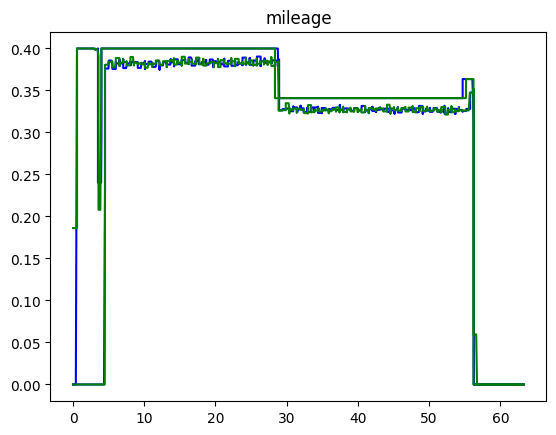

0


In [256]:
temp_var = 'real_wire_speed'
plt.figure()
plt.title(f'mileage')
i = 0
colors = ['blue', 'red', 'green']
for idx, d in enumerate(case_1):
    if idx == (len(case_1) - 1) / 2:
        continue
    color = colors[0] if idx < (len(case_1) - 1) / 2 else colors[2]
    plt.plot(d['time'], np.array(d['given_wire_speed']), color=color)
    # plt.plot(d['time'], np.array(d['real_wire_speed']), color=color)
plt.show()
print(i)